### Load the Reuters Dataset

In [15]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [16]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for key, value in word_index.items()])

In [17]:
' '.join([reverse_word_index.get(i-3, '?') for i in train_data[10]])

'? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3'

### Encode into Word Matrices

In [18]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [31]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels),dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

### Define Model

In [55]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [56]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Train Model

In [57]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [58]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=[x_val,y_val])

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 141us/step - loss: 2.5387 - acc: 0.4925 - val_loss: 1.6733 - val_acc: 0.6470
Epoch 2/20
7982/7982 [==============================] - 1s 94us/step - loss: 1.3444 - acc: 0.7169 - val_loss: 1.2690 - val_acc: 0.7300
Epoch 3/20
7982/7982 [==============================] - 1s 95us/step - loss: 0.9926 - acc: 0.7923 - val_loss: 1.1100 - val_acc: 0.7750
Epoch 4/20
7982/7982 [==============================] - 1s 95us/step - loss: 0.7768 - acc: 0.8354 - val_loss: 1.0114 - val_acc: 0.7830
Epoch 5/20
7982/7982 [==============================] - 1s 95us/step - loss: 0.6180 - acc: 0.8675 - val_loss: 0.9475 - val_acc: 0.8030
Epoch 6/20
7982/7982 [==============================] - 1s 95us/step - loss: 0.4935 - acc: 0.8958 - val_loss: 0.9096 - val_acc: 0.8070
Epoch 7/20
7982/7982 [==============================] - 1s 94us/step - loss: 0.3962 - acc: 0.9152 - val_loss: 0.8994 - val_acc: 0.8120
Epoch 

### Visualize Results

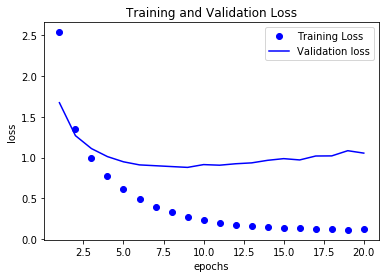

In [59]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

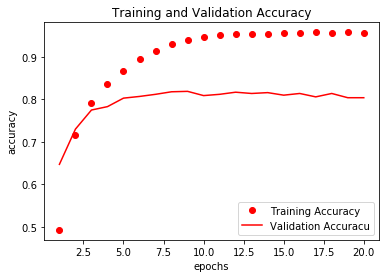

In [60]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'ro', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracu')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

### Retrain to 9 Epochs

In [45]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 139us/step - loss: 2.6135 - acc: 0.4644 - val_loss: 1.7289 - val_acc: 0.6350
Epoch 2/9
7982/7982 [==============================] - 1s 99us/step - loss: 1.4074 - acc: 0.7082 - val_loss: 1.2747 - val_acc: 0.7310
Epoch 3/9
7982/7982 [==============================] - 1s 96us/step - loss: 1.0425 - acc: 0.7786 - val_loss: 1.1035 - val_acc: 0.7630
Epoch 4/9
7982/7982 [==============================] - 1s 95us/step - loss: 0.8180 - acc: 0.8322 - val_loss: 1.0270 - val_acc: 0.7820
Epoch 5/9
7982/7982 [==============================] - 1s 89us/step - loss: 0.6507 - acc: 0.8629 - val_loss: 0.9513 - val_acc: 0.8070
Epoch 6/9
7982/7982 [==============================] - 1s 94us/step - loss: 0.5297 - acc: 0.8904 - val_loss: 0.9206 - val_acc: 0.8120
Epoch 7/9
7982/7982 [==============================] - 1s 96us/step - loss: 0.4213 - acc: 0.9113 - val_loss: 0.9006 - val_acc: 0.8140
Epoch 8/9
798

In [46]:
results=model.evaluate(x_test,one_hot_test_labels)
results

2246/2246 [==============================] - 0s 98us/step


[0.9839374910797907, 0.7858414960459524]

### Make predictions

In [47]:
predictions = model.predict(x_test)